## Saving torch models

* design
* train
* save

##### imports

In [1]:
import torch
from torchvision import datasets, transforms
import helper
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from network import Network

# Transformation
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [2]:
# get the size of the input
sample_image,label = next(iter(testloader))
size_ = sample_image.shape
print(size_)

torch.Size([64, 1, 28, 28])


In [3]:
import torch.nn.functional as F
from torch import nn
from torch import optim

def accuracy(y_hat_tensor,label_tensor):
    '''
    args:
        y_hat_tensor tensor: direct output of the model. 
        label_tensor tensor: actual labels of the given items
    returns:
        accuracy float
        accurate float: number of accurately labeled items
        total_samples float : number of samples investigated
    '''
    y_hat_tensor = torch.exp(y_hat_tensor)
    values, pred_labels = y_hat_tensor.max(1) # works like numpy argmax plus returns the values of the cells.
    accurate = sum(1 for a, b in zip(pred_labels.numpy(), label_tensor.numpy()) if a == b)
    total_samples = len(label_tensor)
    accuracy = accurate/total_samples
    return accuracy,accurate,total_samples

#### call network class

In [5]:
nodes_in_layers[0]

128

In [6]:
input_size = 28*28
output_size = 10
nodes_in_layers = [128,64,32]
model = Network(input_size,output_size,nodes_in_layers)
print(model)

Network(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): Linear(in_features=32, out_features=10, bias=True)
  )
)


#### Loss function and optimiser

In [7]:
criterion = nn.NLLLoss() # Loss function Negative log likelyhood loss
optimizer = optim.Adam(model.parameters(), lr=0.01) #  learning rate 0.003

#### train

In [8]:
epochs = 3
epoch = 0
train_losses = []
test_losses = []
for e in range(epochs):
    running_loss = 0
    total_accurate = 0
    total_samples = 0
    for images, labels in trainloader:
        # Training pass
        output = model(images) # directly passes the images into forward method
        loss = criterion(output, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        batch_train_accuracy,accurate,total_sample = accuracy(output,labels)
        running_loss += loss.item()
        total_accurate += accurate
        total_samples += total_sample
    else:
        with torch.no_grad():
            model.eval()
            test_loss = 0
            total_samples_test = 0
            total_accurate_test = 0
            for images, labels in testloader:
                output = model(images)
                test_loss += criterion(output, labels)
                batch_test_accuracy,accurate_test,total_sample_test = accuracy(output,labels)
                total_accurate_test += accurate_test
                total_samples_test += total_sample_test
        model.train()
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        print('''---------- epoch : {} -----------'''.format(epoch+1))
        print(''' Training Accuracy = {}  - Training Loss = {}'''.format(total_accurate/total_samples,running_loss/len(trainloader)))
        print(''' Test Accuracy = {}  - Test Loss = {}'''.format(total_accurate_test/total_samples_test,test_loss/len(testloader)))
        epoch += 1

---------- epoch : 1 -----------
 Training Accuracy = 0.7954833333333333  - Training Loss = 0.567332905508689
 Test Accuracy = 0.8185  - Test Loss = 0.5232747793197632
---------- epoch : 2 -----------
 Training Accuracy = 0.8403  - Training Loss = 0.4529400130293008
 Test Accuracy = 0.8273  - Test Loss = 0.5007397532463074
---------- epoch : 3 -----------
 Training Accuracy = 0.85045  - Training Loss = 0.42475884831917565
 Test Accuracy = 0.8396  - Test Loss = 0.45917871594429016


#### save model

In [13]:
[layer.out_features for layer in model.layers[:-1]]

[128, 64, 32]

In [18]:
checkpoint = {
    'input_size' : model.layers[0].in_features,
    'output_size' : model.layers[-1].out_features,
    'hidden_layers' : [layer.out_features for layer in model.layers[:-1]],
    'state_dict' : model.state_dict()
    
}

torch.save(checkpoint,'..\models\\4_sample_model.pth')

In [19]:
checkpoint

{'input_size': 784,
 'output_size': 10,
 'hidden_layers': [128, 64, 32],
 'state_dict': OrderedDict([('layers.0.weight',
               tensor([[0.1706, 0.1944, 0.1902,  ..., 0.2872, 0.2750, 0.1758],
                       [0.2243, 0.2366, 0.2358,  ..., 0.3288, 0.2077, 0.2067],
                       [0.1340, 0.1272, 0.1629,  ..., 0.1362, 0.1599, 0.1466],
                       ...,
                       [0.3212, 0.3235, 0.2614,  ..., 0.2259, 0.2245, 0.2772],
                       [0.0643, 0.0645, 0.1017,  ..., 0.1103, 0.0769, 0.1007],
                       [0.1082, 0.0696, 0.0609,  ..., 0.2561, 0.0828, 0.1015]])),
              ('layers.0.bias',
               tensor([-0.1478, -0.2211, -0.1639, -0.2107, -0.0302, -0.2076, -0.1014, -0.2314,
                       -0.0984, -0.0848, -0.0609, -0.1328, -0.0869, -0.1039, -0.0965, -0.1375,
                       -0.2348, -0.5515, -0.1796, -0.3863, -0.1603, -0.1185, -0.1224, -0.1049,
                       -0.1061, -0.3290, -0.1055, -0.2503

In [20]:
model

Network(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): Linear(in_features=32, out_features=10, bias=True)
  )
)

In [21]:
print(model.state_dict().keys())

odict_keys(['layers.0.weight', 'layers.0.bias', 'layers.1.weight', 'layers.1.bias', 'layers.2.weight', 'layers.2.bias', 'layers.3.weight', 'layers.3.bias'])


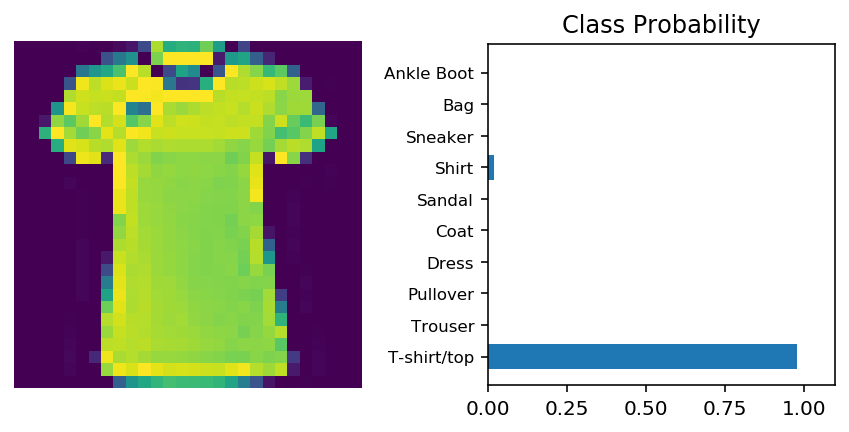

In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper1

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)
#Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logps = model(img)
ps = torch.exp(logps)
# Plot the image and probabilities
helper1.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

In [24]:
model.state_dict()['layers.0.weight']

tensor([[0.1706, 0.1944, 0.1902,  ..., 0.2872, 0.2750, 0.1758],
        [0.2243, 0.2366, 0.2358,  ..., 0.3288, 0.2077, 0.2067],
        [0.1340, 0.1272, 0.1629,  ..., 0.1362, 0.1599, 0.1466],
        ...,
        [0.3212, 0.3235, 0.2614,  ..., 0.2259, 0.2245, 0.2772],
        [0.0643, 0.0645, 0.1017,  ..., 0.1103, 0.0769, 0.1007],
        [0.1082, 0.0696, 0.0609,  ..., 0.2561, 0.0828, 0.1015]])